In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn import cross_validation
from sklearn.cross_decomposition import PLSRegression, PLSSVD

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
hitters_df= pd.read_csv("Hitters.csv",header= 0,na_values ="NA")

In [3]:
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
#find out about the number of NA in the salary column
na_col = np.sum(pd.isnull(hitters_df['Salary']))
print ("the number of NA columns :{} ".format(na_col))

the number of NA columns :59 


In [5]:
#drop the observation that contain the NA value 
Hitters_drop_na = hitters_df.dropna().reset_index(drop=True)
#double check for the number of NA value 
print ("the number of NA columns after dropping now :{}".format(Hitters_drop_na['Salary'].isnull().sum()))

the number of NA columns after dropping now :0


https://github.com/qx0731/ISL_python/blob/master/Chapter_6_sec_6.5.ipynb

Lab 2

In [6]:
hitter_df = pd.read_csv("Hitters.csv", index_col = 0).dropna()
hitter_df.index.name = "Player"
hitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [7]:
X_train = pd.read_csv('Hitters_X_train.csv',index_col = 0)
y_train = pd.read_csv('Hitters_y_train.csv', index_col = 0 )
X_test = pd.read_csv('Hitters_X_test.csv', index_col = 0)
y_test = pd.read_csv('Hitters_y_test.csv',index_col = 0)

**6.6.1 Rigde Regression**

Since there are three columns " League, Divison, NewLeague" that are categorical, we need to use get_dummies() to convert those into binaries numerical variables 

In [8]:
dummies = pd.get_dummies(hitter_df[['League','Division','NewLeague']])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6+ KB


Now we need remove the Salary column as well as the categorical column that we have created

In [9]:
y = hitter_df.Salary
y.head()
X_ = hitter_df.drop(['Salary','League','Division', 'NewLeague'],axis= 1 ).astype('float64')
X = pd.concat([X_,dummies[['League_N','Division_W','NewLeague_N']]],axis = 1 )
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7+ KB


Text(0.5,1,'Ridge coefficients as a function of the regularizations')

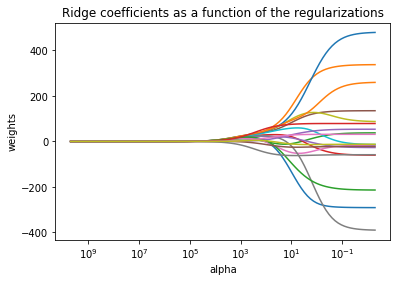

In [10]:
alphas = 10 **np.linspace(10,-2, 100)* 0.5 
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha =a )
    ridge.fit(scale(X),y)
    coefs.append(ridge.coef_)
ax = plt.gca() #to get the keyarg
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis 
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularizations')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using alpha = 4 ( in the book lambda = 4)

In [12]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(scaler.transform(X_train),y_train) #transform the data 
predict = ridge2.predict(scaler.transform(X_test))
mse = mean_squared_error(y_test,predict) #calculate the test MSE 
print('MSE when using alpha = 4 is :{}'.format(mse))

MSE when using alpha = 4 is :97383.68965102117


In [13]:
pd.Series(ridge2.coef_.flatten(),index = X.columns)

AtBat         -161.784058
Hits           118.911404
HmRun           52.645719
Runs           -43.295947
RBI             37.339573
Walks          138.214992
Years         -106.916784
CAtBat         -21.080864
CHits          115.933862
CHmRun         -17.949420
CRuns          239.723217
CRBI           -17.945273
CWalks         -59.754770
PutOuts         21.752383
Assists        -68.676906
Errors          89.610291
League_N        31.048268
Division_W     -13.553466
NewLeague_N      4.350305
dtype: float64

we can try the model with a very large amount of alpha = 10^10 

In [14]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(scale(X_train),y_train)
prediction2= ridge3.predict(scale(X_test))
mse2 = mean_squared_error(y_test,prediction2) #calculate the test MSE 
print('MSE when using alpha = 4 is :{}'.format(mse2))

MSE when using alpha = 4 is :193253.09741651407


We can see here that the penalty shrinks the coefficients to a very large degree and makes the model more biased , resulting in a higher MSE 

Instead of randomly choosing alpha = 4, we can use cross validation to choose the best value for the tuning paramter alpha. It can be done using the cross-validated ridge regression function, RidgeCV(). 

In [15]:
ridgeCV = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgeCV.fit(scale(X_train),y_train)


RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [16]:
print('the value of alpha is : {}'.format(ridgeCV.alpha_))

the value of alpha is : 115.5064850041579


Therefore , we can see that the more suitable value of alpha shall be 115.506. Now we find out what is the associated MSE 

In [17]:
ridge4 = Ridge(alpha= ridgeCV.alpha_)
ridge4.fit(scale(X_train), y_train)
MSE  = mean_squared_error(y_test, ridge4.predict(scale(X_test)))
print('the MSE of the test when alpha = {} is {}'.format(ridgeCV.alpha_,MSE))

the MSE of the test when alpha = 115.5064850041579 is 97384.92959172589


# **6.6.2 The Lasso**

Text(0.5,1,'Lasso coefficients as a function of the regularization')

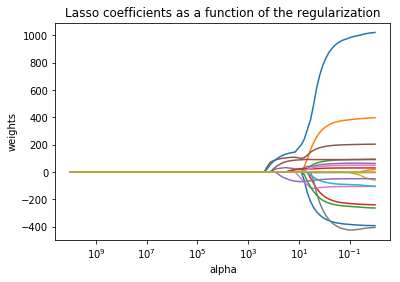

In [18]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha =a )
    lasso.fit(scale(X_train),y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log') #set the scale into a log scale
ax.set_xlim(ax.get_xlim()[:: -1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')


We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [19]:
lassocv = LassoCV(alphas = None, cv = 10 , max_iter= 100000)
lassocv.fit(scale(X_train), y_train.values.ravel()) #fit the model

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [20]:
alp = lassocv.alpha_
print ('the alpha of the model is ;{}'.format(alp))

lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(scale(X_train),y_train)
mse = mean_squared_error(y_test, lasso.predict(scale(X_test))) #find out the MSE of the model

print('with alpha = {} , the MSE of the model is {}'.format(alp,mse))

the alpha of the model is ;30.013822564464284
with alpha = 30.013822564464284 , the MSE of the model is 102924.90954696963


In [21]:
 pd.Series(lasso.coef_.flatten(), index=X.columns)
# lasso.coef_
# X.columns

AtBat            0.000000
Hits             0.000000
HmRun            2.154219
Runs             0.000000
RBI             30.835560
Walks          104.071528
Years           -0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns          132.858095
CRBI             0.000000
CWalks           0.000000
PutOuts          1.896185
Assists        -51.058752
Errors          76.779641
League_N         0.000000
Division_W       0.000000
NewLeague_N      0.000000
dtype: float64

the new MSE is substantially lower than the test set MSE of the null model and of least squares , and only a little worse than the test MSE of the Ridge regression with alpha chosen by cross-validation
Hower, the lasso has a substantial advantage over the ridge regression in that the resulting coefficient estimates are sparse . Here we see that 13 of the 19 coefficients estimates are exactly zero 

# Lab 3: PCR and PLS Regression

**6.7.1 Principal Components Regression**

Sklearn does not have an implementation of PCA and regression combined like pls, package in R. Therefore we have to perform it ourselves. 
First, we have to perform PCA , with scaling of the data 

In [22]:
pca = PCA()
X_transform = pca.fit_transform(scale(X))
print('the shape is {}'.format(pca.components_.shape)) 
pd.DataFrame(pca.components_.T).loc[:4,:5] #take a look at the 5 columns and 4 rows of the table 

the shape is (19, 19)


,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


In [23]:
print('the shape is {}'.format(X_transform.shape) )
pd.DataFrame(X_transform).loc[:4,:5]


the shape is (263, 19)


,0,1,2,3,4,5
0,-0.009649,1.870522,1.265145,-0.935481,1.109636,1.211972
1,0.411434,-2.429422,-0.909193,-0.264212,1.232031,1.826617
2,3.466822,0.825947,0.555469,-1.616726,-0.857488,-1.028712
3,-2.558317,-0.230984,0.519642,-2.176251,-0.820301,1.491696
4,1.027702,-1.573537,1.331382,3.494004,0.983427,0.513675


Now we will perform 10-fold cross-validation to see how it influences the MSE 

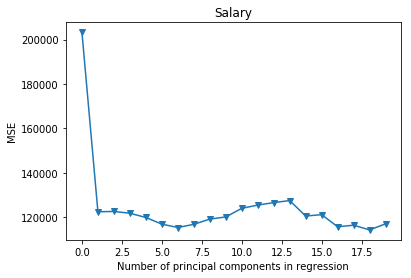

In [24]:

# 10-fold CV, with shuffle# 10-fol 
n = len(X_transform)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_transform[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [25]:
regr_test = LinearRegression()
regr_test.fit(X_transform, y)
regr_test.coef_

array([ 106.36859204,  -21.60350456,   24.2942534 ,  -36.9858579 ,
        -58.41402748,   62.20632652,   24.63862038,   15.82817701,
         29.57680773,   99.64801199,  -30.11209105,   20.99269291,
         72.40210574, -276.68551696,  -74.17098665,  422.72580227,
       -347.05662353, -561.59691587,  -83.25441536])

https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%206.ipynb
    https://github.com/jcrouser/islr-python/blob/master/Lab%2011%20-%20PCR%20and%20PLS%20Regression%20in%20Python.ipynb

(-1, 19.95)

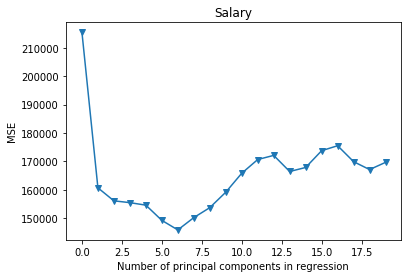

In [26]:
pca2 = PCA()
X_transform_train = pca2.fit_transform(scale(X_train))
n = len(X_transform_train)

#10 -fold CV, with shuffle
kf_10 = KFold(n_splits = 10 , shuffle = False , random_state = 1 )

mse = []

#Calculate MSE with only the intercept ( no principal components in regressions)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train , cv= kf_10 , scoring = 'neg_mean_squared_error').mean()
mse.append(score)

#Calculate MSE using CV for the 19 components, adding one component at a time
for i in np.arange(1,20):
    score = -1*cross_val_score(regr,X_transform_train[:,:i],y_train , cv = kf_10 , scoring = 'neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin = -1)

In [27]:
X_transform_test = pca2.transform(scale(X_test))[:,: 7 ]

#Train regression model on training data 
regr = LinearRegression()
regr.fit(X_transform_train[: , : 7] , y_train)

#Prediction with test data 
pred = regr.predict(X_transform_test)
mean_squared_error(y_test , pred)

96320.02078250326

# 6.7.2 Partial Least Squares 

(-1, 19.9)

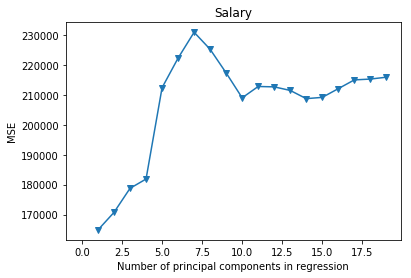

In [38]:
n = len(X_train)

# 10-fold CV with shuffle

kf_10 = cross_validation.KFold(n,n_folds = 10, shuffle = True,random_state = 1)

mse = []

for i in np.arange(1,20):
    pls = PLSRegression(n_components = i)
    score = cross_validation.cross_val_score(pls,scale(X_train),y_train,cv=kf_10 , scoring ='mean_squared_error' ).mean()
    mse.append(-score)
    
#now then we plot the results
plt.plot(np.arange(1,20),np.array(mse),'-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin =-1)

In [39]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train),y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

102234.27995999217